In [1]:
import numpy as np
from tqdm.auto import tqdm

from exputils.RoM.actual import calculate_RoM_actual
from exputils.RoM.dot import calculate_RoM_dot
from exputils.state.random import make_random_quantum_state
from exputils.state.tensor import make_random_tensor_product_state

# from exputils.stabilizer_group import total_stabilizer_group_size


def make_rho_vec(rho_vec_method: str, n_qubit: int, seed: int):
    if rho_vec_method == "mixed":
        rho_vec = make_random_quantum_state(rho_vec_method, n_qubit, seed)
    elif rho_vec_method == "pure":
        rho_vec = make_random_quantum_state(rho_vec_method, n_qubit, seed)
    elif rho_vec_method == "tensor":
        rho_vec = make_random_tensor_product_state("mixed", n_qubit, seed)
    elif rho_vec_method in ["H", "F"]:
        rho_vec = make_random_tensor_product_state(rho_vec_method, n_qubit, seed)
    else:
        raise ValueError
    return rho_vec

In [2]:
# 4 qubit, mixed, seed = 0

n_qubit = 4
seed = 0

rho_vec = make_rho_vec("mixed", n_qubit, seed)

sub_opt = calculate_RoM_dot(n_qubit, rho_vec, 0.05, method="gurobi")[0]
opt = calculate_RoM_actual(n_qubit, rho_vec, method="gurobi")[0]

print(sub_opt, opt, sub_opt - opt)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-16
1.3993901695330042 1.3762097510033595 0.023180418529644697


In [3]:
# binary search

n_qubit = 4

thresholds = []
for seed in tqdm(range(100)):
    rho_vec = make_rho_vec("mixed", n_qubit, seed)

    RoM_exact = calculate_RoM_actual(n_qubit, rho_vec, method="gurobi")[0]

    eps = 10**-10

    ng = 0
    ok = 1

    for _ in range(15):
        K = (ng + ok) / 2
        RoM = calculate_RoM_dot(n_qubit, rho_vec, K, method="gurobi")[0]
        if RoM < RoM_exact + eps:
            ok = K
            ok_RoM = RoM
        else:
            ng = K

    print(seed, ok, ng, ok_RoM - RoM_exact)
    thresholds.append(ok)

  0%|          | 0/100 [00:00<?, ?it/s]

0 0.317108154296875 0.31707763671875 2.220446049250313e-15
1 0.450286865234375 0.45025634765625 0.0
2 0.462982177734375 0.46295166015625 -2.220446049250313e-16
3 0.64581298828125 0.645782470703125 2.220446049250313e-16
4 0.3519287109375 0.351898193359375 -4.440892098500626e-16
5 0.279144287109375 0.27911376953125 1.5543122344752192e-15
6 0.316741943359375 0.31671142578125 1.1102230246251565e-15
7 0.34637451171875 0.346343994140625 -8.881784197001252e-16
8 0.196746826171875 0.19671630859375 -2.220446049250313e-16
9 0.298095703125 0.298065185546875 -6.661338147750939e-16
10 0.4080810546875 0.408050537109375 -1.3322676295501878e-15
11 0.417877197265625 0.4178466796875 -6.661338147750939e-16
12 0.444091796875 0.444061279296875 1.5543122344752192e-15
13 0.59820556640625 0.598175048828125 -8.881784197001252e-16
14 0.3363037109375 0.336273193359375 -6.661338147750939e-16
15 0.5421142578125 0.542083740234375 0.0
16 0.39996337890625 0.399932861328125 2.220446049250313e-16
17 0.27752685546875 0.

In [4]:
print(np.mean(thresholds))
print(np.std(thresholds))

0.4454443359375
0.15396106863662307


(array([11., 14., 16., 22., 15., 10.,  4.,  3.,  3.,  2.]),
 array([0.19140625, 0.26288147, 0.33435669, 0.40583191, 0.47730713,
        0.54878235, 0.62025757, 0.69173279, 0.76320801, 0.83468323,
        0.90615845]),
 <BarContainer object of 10 artists>)

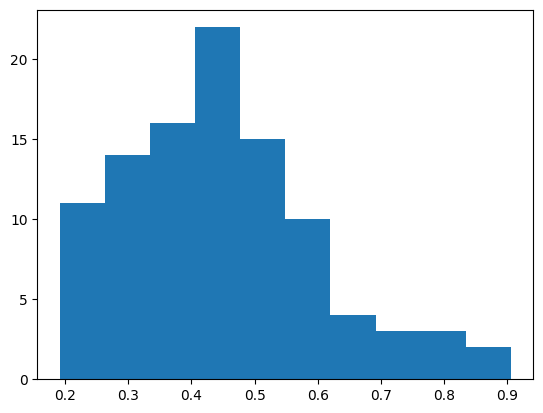

In [5]:
import matplotlib.pyplot as plt

plt.hist(thresholds)

In [6]:
np.min(thresholds), np.max(thresholds)

(0.19140625, 0.906158447265625)